In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

sat = pd.read_csv('../data/Modified_Satellite_Database.csv')

sat.head()

,Name of Satellite,Country,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Date of Launch,Expected Lifetime,Year of Launch
0,1HOPSAT,USA,0.0,566.0,576.0,0.000720,36.90,96.08,22.0,2019-12-11,0.5,2019
1,Aalto-1,Finland,0.0,497.0,517.0,0.001454,97.45,94.70,4.5,2017-06-23,2.0,2017
2,ABS-2,Multinational,75.0,35778.0,35793.0,0.000178,0.08,1436.03,6330.0,2014-02-06,15.0,2014
3,ABS-2A,Multinational,-75.0,35700.0,35700.0,0.000000,0.00,1436.10,1800.0,2016-06-15,15.0,2016
4,ABS-3A,Multinational,-3.0,35788.0,35803.0,0.000178,0.10,1436.00,2000.0,2015-03-02,15.0,2015


# Graphing

Displayed columns to get the right column values for the graph.

In [2]:
sat.columns

Index(['Name of Satellite', 'Country', 'Longitude of GEO (degrees)',
       'Perigee (km)', 'Apogee (km)', 'Eccentricity', 'Inclination (degrees)',
       'Period (minutes)', 'Launch Mass (kg.)', 'Date of Launch',
       'Expected Lifetime', 'Year of Launch'],
      dtype='object')

'Year of Launch' and 'Expected Lifetime' values used for a scatter graph.

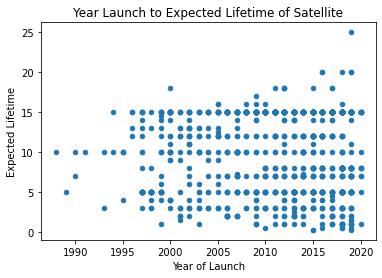

In [3]:
sat.plot(kind = 'scatter', x = 'Year of Launch', y= 'Expected Lifetime')
plt.title('Year Launch to Expected Lifetime of Satellite')

plt.savefig('../graphs/scatter.png')

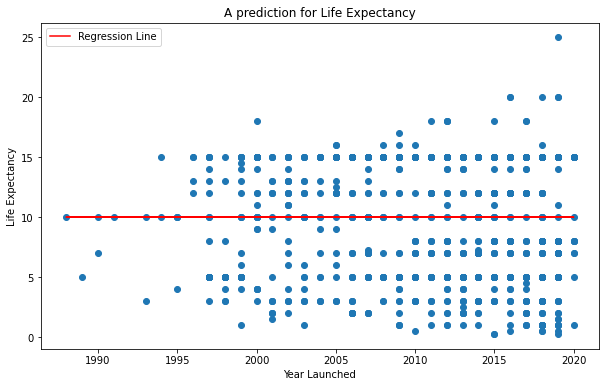

In [4]:
from utils import draw_line

year = sat['Year of Launch'].values
life = sat['Expected Lifetime'].values

draw_line(year, life, slope= 0, intercept = 10, figsize = (10,6) )

In [5]:
# statsmodels api
import statsmodels.api as sm

X = sat['Year of Launch']
y = sat['Expected Lifetime']
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Expected Lifetime   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6915
Date:                Mon, 07 Dec 2020   Prob (F-statistic):              0.406
Time:                        22:42:02   Log-Likelihood:                -3389.1
No. Observations:                1124   AIC:                             6782.
Df Residuals:                    1122   BIC:                             6792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -27.6249     45.148     -0.612      0.541    -116.210      60.960
Year of Launch     0.0187      0.022      0.832      0.406      -0.025       0.063
==============================================================================
Omnibus:                     5594.657   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.884
Skew:                          -0.213   Prob(JB):                     1.12e-20
Kurtosis:                       1.666   Cond. No.                     6.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

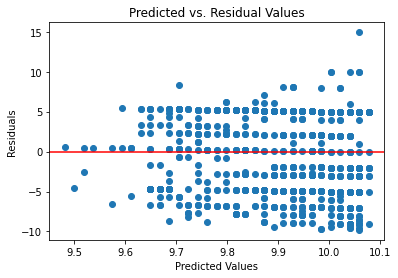

In [6]:
residuals = res.resid
y_pred = res.predict(X)

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residual Values')
plt.show

plt.savefig('../graphs/predicted.png')

In [7]:

ncols = 14
nrows = 15
X = np.zeros(shape = (nrows,ncols))

for i in range(ncols):
    X[:,i] = np.random.normal(size = nrows)
    
y = np.random.normal(size = nrows)

# modified OLS Regression results
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
res.summary()

C:\Users\cappy\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     6.892
Date:                Mon, 07 Dec 2020   Prob (F-statistic):              0.291
Time:                        22:42:02   Log-Likelihood:                 10.807
No. Observations:                  15   AIC:                             6.386
Df Residuals:                       1   BIC:                             16.30
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.9452      2.031      5.389      0.117     -14.862      36.752
x2            18.1347      3.326      5.452      0.115     -24.128      60.398
x3           -12.0893      2.145     -5.636      0.112     -39.347      15.168
x4            20.3244      3.642      5.580      0.113     -25.955      66.604
x5            21.4227      3.891      5.506      0.114     -28.018      70.864
x6            24.9790      4.664      5.356      0.118     -34.277      84.235
x7           -10.5408      1.903     -5.539      0.114     -34.723      13.641
x8           -15.7137      2.844     -5.525      0.114     -51.852      20.425
x9           -30.6397      5.416     -5.658      0.111     -99.453      38.174
x10            0.6410      0.224      2.862      0.214      -2.204       3.486
x11           -0.4817      0.952     -0.506      0.702     -12.584      11.621
x12          -19.0695      3.292     -5.792      0.109     -60.903      22.764
x13           10.8041      1.868      5.783      0.109     -12.935      34.543
x14           20.7646      3.746      5.543      0.114     -26.833      68.363
==============================================================================
Omnibus:                        0.682   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.711   Jarque-Bera (JB):                0.665
Skew:                           0.399   Prob(JB):                        0.717
Kurtosis:                       2.346   Cond. No.                         186.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

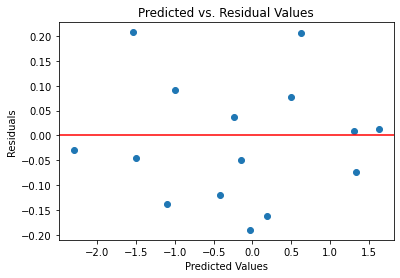

In [8]:
residuals = res.resid
y_pred = res.predict(X)

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residual Values')
plt.show

plt.savefig('../graphs/predicted_mod.png')